In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
f_path = glob.glob("./data/*")
f_path

['./data\\codeBook_v3.xlsx',
 './data\\KP2020.csv',
 './data\\KP2021.csv',
 './data\\NPA2020.csv']

In [3]:
file_names = []
for name in os.listdir("D:/WORK/수원대학교/BDAA 학회/2023년 지역 치안 안전 데이터 분석 공모전 개최/data/"):
    file_names.append(name.split('.')[0])
file_names

['codeBook_v3', 'KP2020', 'KP2021', 'NPA2020']

In [4]:
codeBook_v3 = pd.read_excel("D:/WORK/수원대학교/BDAA 학회/2023년 지역 치안 안전 데이터 분석 공모전 개최/data/codeBook_v3.xlsx")
KP2020 = pd.read_csv("D:/WORK/수원대학교/BDAA 학회/2023년 지역 치안 안전 데이터 분석 공모전 개최/data/KP2020.csv", encoding='cp949')
KP2021 = pd.read_csv("D:/WORK/수원대학교/BDAA 학회/2023년 지역 치안 안전 데이터 분석 공모전 개최/data/KP2021.csv", encoding='cp949')
NPA2020 = pd.read_csv("D:/WORK/수원대학교/BDAA 학회/2023년 지역 치안 안전 데이터 분석 공모전 개최/data/NPA2020.csv", encoding='cp949')


In [5]:
tmp1 = NPA2020.drop("RECV_CPLT_TM",axis=1)
tmp1.columns = KP2020.drop("RECV_DEPT_NM",axis=1).columns
data_2020 = pd.concat([tmp1, KP2020.drop("RECV_DEPT_NM",axis=1)])

In [6]:
data_2021 = KP2021.drop("RECV_DEPT_NM",axis=1).copy()

In [7]:
data_20t21 = pd.concat([data_2020, data_2021])
data_20t21.reset_index(drop=True,inplace = True)
data_20t21

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...
3849376,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
3849377,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
3849378,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
3849379,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [11]:
car_data_20t21 = data_20t21[data_20t21["EVT_CL_CD"] == 401]
voice_data_20t21 = data_20t21[data_20t21["EVT_CL_CD"] == 215]
car_data_20t21.reset_index(drop=True, inplace=True)

In [12]:
car_data_20t21[car_data_20t21["RPTER_SEX"] =='{']

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
3606,20200114,13,10,401,{,NaN,127.404663,36.341685,NaN


In [13]:
car_data_20t21.iloc[3606, 4] = 1

<AxesSubplot:>

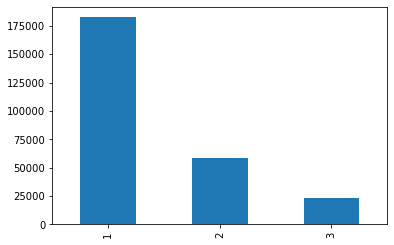

In [21]:
car_data_20t21["RPTER_SEX"].astype(int).value_counts().plot.bar()